In [391]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns

In [392]:
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')
submission = pd.read_csv('../Data/sample_submission.csv')
sub_train = train

# Feature 설명

index   
gender: 성별   (o)
car: 차량 소유 여부   (o)
reality: 부동산 소유 여부   (o)
child_num: 자녀 수   
income_total: 연간 소득  (o)
income_type: 소득 분류   
['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']   
edu_type: 교육 수준   
['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']   
family_type: 결혼 여부   
['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']   
house_type: 생활 방식   
['Municipal apartment', 'House / apartment', 'With parents','Co-op apartment', 'Rented apartment', 'Office apartment']   
DAYS_BIRTH: 출생일   
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미   
DAYS_EMPLOYED: 업무 시작일   (o)   
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미,양수 값은 고용되지 않은 상태를 의미함   
FLAG_MOBIL: 핸드폰 소유 여부   
work_phone: 업무용 전화 소유 여부   
phone: 전화 소유 여부   
email: 이메일 소유 여부   
occyp_type: 직업 유형	   												
family_size: 가족 규모   
begin_month: 신용카드 발급 월 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미 (o)     

credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도   
=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함   



# DEF 모음

In [393]:
def box_value(col):
    Q1 = abs(train[train[col] > 0][col].quantile(0.25))
    Q2 = abs(train[train[col] > 0][col].quantile(0.50))
    Q3 = abs(train[train[col] > 0][col].quantile(0.75))
    IQR = Q3 - Q1

    return Q1, Q2, Q3, IQR

# Preprocessing

## 1. DAYS_EMPLOYED

In [394]:
train[train['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].value_counts()


365243    4438
Name: DAYS_EMPLOYED, dtype: int64

In [395]:
train.loc[train['DAYS_EMPLOYED'] > 0,'DAYS_EMPLOYED'] = 0
test.loc[test['DAYS_EMPLOYED'] > 0,'DAYS_EMPLOYED'] = 0

<AxesSubplot:ylabel='Frequency'>

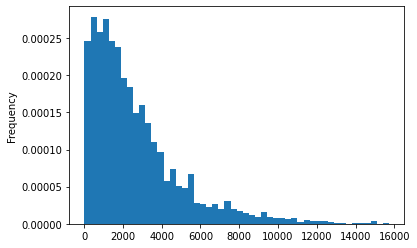

In [396]:
abs(train.loc[train['DAYS_EMPLOYED'] < 0,'DAYS_EMPLOYED']).plot(kind='hist',bins=50,density=True)

In [397]:
train.loc[train['DAYS_EMPLOYED'] < 0,'DAYS_EMPLOYED'] = train.loc[train['DAYS_EMPLOYED'] < 0,'DAYS_EMPLOYED'].abs()
test.loc[test['DAYS_EMPLOYED'] < 0,'DAYS_EMPLOYED'] = test.loc[test['DAYS_EMPLOYED'] < 0,'DAYS_EMPLOYED'].abs()
train['DAYS_EMPLOYED']

0        4709
1        1540
2        4434
3        2092
4        2105
         ... 
26452    1984
26453    2475
26454    2015
26455     107
26456    1013
Name: DAYS_EMPLOYED, Length: 26457, dtype: int64

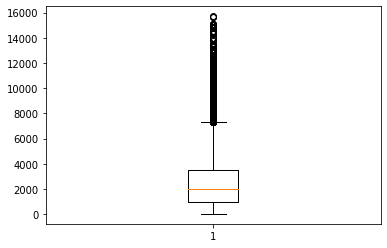

In [398]:
plt.boxplot(abs(train[train['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED']))
plt.show()

In [399]:
Q1 = abs(train[train['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].quantile(0.25))
Q2 = abs(train[train['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].quantile(0.50))
Q3 = abs(train[train['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].quantile(0.75))
IQR = Q3 - Q1

print(f'Q1 : {Q1} Q3 : {Q3} IQR : {IQR}')

Q1 : 969.5 Q3 : 3506.0 IQR : 2536.5


In [400]:
train.loc[(train['DAYS_EMPLOYED'] <= Q1 - 1.5 * IQR) | (train['DAYS_EMPLOYED'] >= Q3 + 1.5 *IQR), 'DAYS_EMPLOYED'] = Q3
test.loc[(test['DAYS_EMPLOYED'] <= Q1 - 1.5 * IQR) | (test['DAYS_EMPLOYED'] >= Q3 + 1.5 *IQR), 'DAYS_EMPLOYED'] = Q3

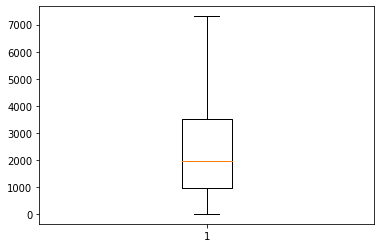

In [401]:
plt.boxplot(abs(train[train['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED']))
plt.show()

In [402]:
def dayEMP_category(day_ep):
    ep = ''
    if day_ep == 0: ep = 0
    elif day_ep <= Q1: ep = 1
    elif day_ep <= Q2: ep = 2
    elif day_ep <= Q3: ep = 3
    elif day_ep > Q3: ep = 4
       
    return ep


In [403]:
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].apply(lambda x : dayEMP_category(x))
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].apply(lambda x : dayEMP_category(x))

In [404]:
train['DAYS_EMPLOYED'].value_counts()

3    6763
2    5506
1    5505
0    4438
4    4245
Name: DAYS_EMPLOYED, dtype: int64

## Begin_month

<AxesSubplot:ylabel='Frequency'>

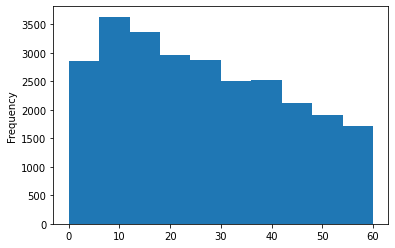

In [405]:
abs(train['begin_month']).plot(kind='hist', bins = 10)

In [406]:
train['begin_month'] = train['begin_month'].abs()
test['begin_month'] = test['begin_month'].abs()

In [407]:
begin_catagory = [0,1,1,2,2,3,3,4,4,4]
train['begin_month'] = pd.cut(train['begin_month'], bins = 10, labels= begin_catagory, ordered= False)
test['begin_month'] = pd.cut(test['begin_month'], bins = 10, labels= begin_catagory, ordered= False)

In [408]:
train['begin_month'].value_counts()

1    6911
2    5773
4    5362
3    4965
0    3446
Name: begin_month, dtype: int64

## income_total

<AxesSubplot:ylabel='Frequency'>

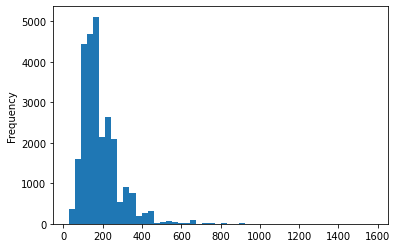

In [409]:
(train['income_total']/1000).plot(kind = 'hist', bins = 50)

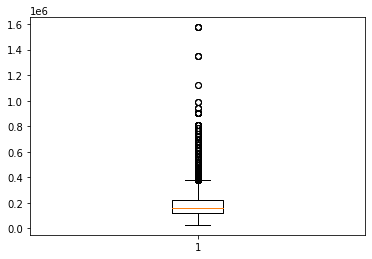

In [410]:
plt.boxplot(train['income_total'])
plt.show()

In [411]:
Q1 = box_value('income_total')[0]
Q2 = box_value('income_total')[1]
Q3 = box_value('income_total')[2]
IQR = box_value('income_total')[3]

In [412]:
train.loc[(train['income_total'] <= Q1 - 1.5 * IQR) | (train['income_total'] >= Q3 + 1.5 *IQR), 'income_total'] = Q3 + IQR/3
test.loc[(test['income_total'] <= Q1 - 1.5 * IQR) | (test['income_total'] >= Q3 + 1.5 *IQR), 'income_total'] = Q3 + IQR/3

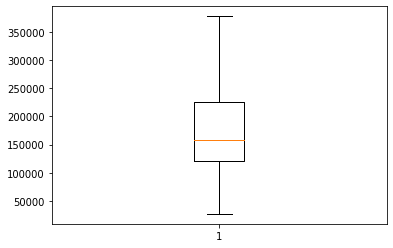

In [413]:
plt.boxplot(train['income_total'])
plt.show()

In [414]:
def box_category(value):
    ep = ''
    if value <= Q1: ep = 0
    elif value <= Q2: ep = 1
    elif value <= Q3: ep = 2
    elif value > Q3: ep = 3
       
    return ep

In [415]:
train['income_total'] = train['income_total'].apply(lambda x : box_category(x))
test['income_total'] = test['income_total'].apply(lambda x : box_category(x))

In [416]:
train['income_total'].value_counts()

2    7334
0    6751
1    6685
3    5687
Name: income_total, dtype: int64

## Gender, Car, Reality

In [417]:
train['gender'] = train['gender'].replace(['F','M'],[0,1])
test['gender'] = test['gender'].replace(['F','M'],[0,1])
print('gender :')
print(train['gender'].value_counts())
print('--------------')

print('Having a car or not : ')
train['car'] = train['car'].replace(['N','Y'],[0,1])
test['car'] = test['car'].replace(['N','Y'],[0,1])
print(train['car'].value_counts())
print('--------------')

print('Having house reality or not: ')
train['reality'] = train['reality'].replace(['N','Y'],[0,1])
test['reality'] = test['reality'].replace(['N','Y'],[0,1])
print(train['reality'].value_counts())
print('--------------')

gender :
0    17697
1     8760
Name: gender, dtype: int64
--------------
Having a car or not : 
0    16410
1    10047
Name: car, dtype: int64
--------------
Having house reality or not: 
1    17830
0     8627
Name: reality, dtype: int64
--------------


In [418]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   index          26457 non-null  int64   
 1   gender         26457 non-null  int64   
 2   car            26457 non-null  int64   
 3   reality        26457 non-null  int64   
 4   child_num      26457 non-null  int64   
 5   income_total   26457 non-null  int64   
 6   income_type    26457 non-null  object  
 7   edu_type       26457 non-null  object  
 8   family_type    26457 non-null  object  
 9   house_type     26457 non-null  object  
 10  DAYS_BIRTH     26457 non-null  int64   
 11  DAYS_EMPLOYED  26457 non-null  int64   
 12  FLAG_MOBIL     26457 non-null  int64   
 13  work_phone     26457 non-null  int64   
 14  phone          26457 non-null  int64   
 15  email          26457 non-null  int64   
 16  occyp_type     18286 non-null  object  
 17  family_size    26457 non-null  

## DAYS_BIRTH

In [421]:
train['DAYS_BIRTH'] = (train['DAYS_BIRTH'].abs()/365).astype(int)
test['DAYS_BIRTH'] = (test['DAYS_BIRTH'].abs()/365).astype(int)

In [420]:
train['DAYS_BIRTH']

0        38
1        31
2        52
3        41
4        41
         ..
26452    33
26453    41
26454    27
26455    27
26456    53
Name: DAYS_BIRTH, Length: 26457, dtype: int32